  Compte  Capital investi (€)  Impôt payé (€)  Gain net (€)  \
0    PEA                14000      606.744831   2920.841395   
1    CTO                14000     1058.275868   2469.310358   

   Valeur nette finale (€)  
0             16920.841395  
1             16469.310358  


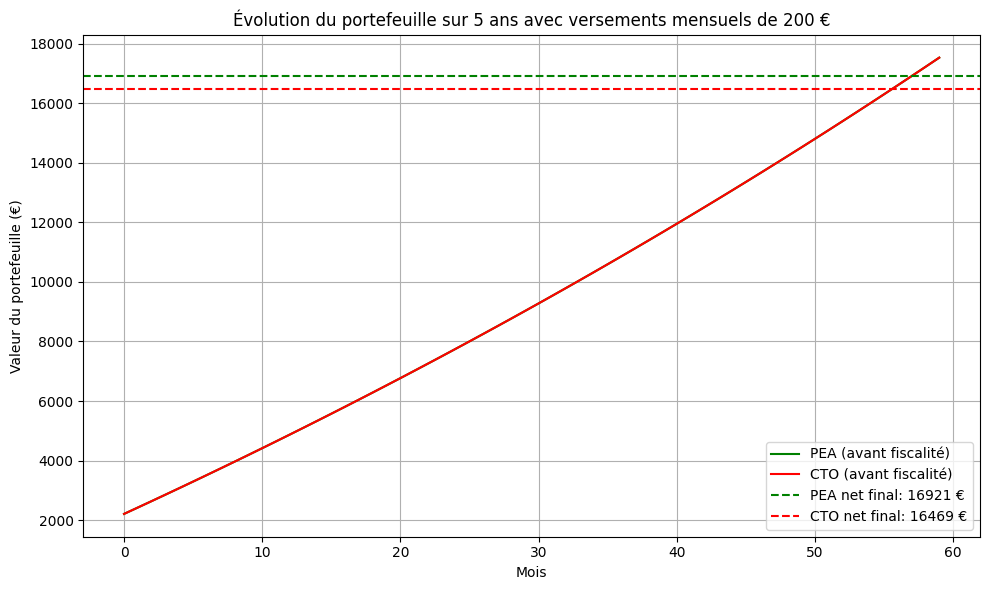

In [ ]:
# Titre : PEA vs CTO avec DCA (Dollar Cost Averaging)
# Contenu : Votre deuxième script avec versements réguliers

"""
# Stratégie DCA (Investissement Régulier)
Avantages du DCA pour réduire le risque de timing
"""

# Section interactive avec widgets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Paramètres personnalisables
capital_initial = 2000           # Montant initial investi sur chaque compte
versement_mensuel = 200          # Versement mensuel régulier (DCA)
annual_return = 0.08             # Rendement annuel estimé (8%)
years = 5                        # Durée d’investissement
months = years * 12
monthly_return = (1 + annual_return) ** (1/12) - 1  # Rendement mensuel composé

# Fiscalité
fiscal_pea = 0.172               # PEA : prélèvements sociaux après 5 ans
fiscal_cto = 0.30                # CTO : PFU (impôt + prélèvements sociaux)

# Fonction pour simuler un portefeuille avec DCA
def simulate_portfolio(initial, monthly, rate, months, tax_rate):
    values = []
    total_invested = initial
    value = initial

    for i in range(months):
        value = value * (1 + rate) + monthly
        total_invested += monthly
        values.append(value)

    gain = value - total_invested
    tax = gain * tax_rate if gain > 0 else 0
    net_value = value - tax
    net_gain = gain - tax
    return net_value, total_invested, net_gain, tax, values

# Simulation PEA
pea_net, pea_invested, pea_gain_net, pea_tax, pea_values = simulate_portfolio(
    capital_initial, versement_mensuel, monthly_return, months, fiscal_pea
)

# Simulation CTO
cto_net, cto_invested, cto_gain_net, cto_tax, cto_values = simulate_portfolio(
    capital_initial, versement_mensuel, monthly_return, months, fiscal_cto
)

# Résumé dans un tableau
df_dca = pd.DataFrame({
    "Compte": ["PEA", "CTO"],
    "Capital investi (€)": [pea_invested, cto_invested],
    "Impôt payé (€)": [pea_tax, cto_tax],
    "Gain net (€)": [pea_gain_net, cto_gain_net],
    "Valeur nette finale (€)": [pea_net, cto_net]
})

print(df_dca)

# Courbe d'évolution (avant impôt, sinon il faudrait simuler une fiscalité continue)
plt.figure(figsize=(10, 6))
plt.plot(pea_values, label="PEA (avant fiscalité)", color="green")
plt.plot(cto_values, label="CTO (avant fiscalité)", color="red")
plt.axhline(y=pea_net, color="green", linestyle="--", label=f"PEA net final: {pea_net:.0f} €")
plt.axhline(y=cto_net, color="red", linestyle="--", label=f"CTO net final: {cto_net:.0f} €")
plt.title("Évolution du portefeuille sur 5 ans avec versements mensuels de 200 €")
plt.xlabel("Mois")
plt.ylabel("Valeur du portefeuille (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
